# I will now attempt to perform classification analysis on a database about rice......I know.....very interesting :^) 

# First of all, I will import all the necessary libraries for classification and plots 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Τhese are for fun
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

Τhen I will import the super awesome dataset about rice :^) 

In [18]:
df = pd.read_csv("......./classification_data.csv") 

In [8]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


Ι will see the names of the columns, and the general description of this dataset.

In [167]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

# The columns of this dataset, are the following: 
1) id: id number of the rice grain
2) Area: area of the grain of rice 
3) MajorAxisLength: major axis length of the grain of rice
4) MinorAxisLength: minor axis length of the grain of rice
5) Eccentricity: deviation of the curve of the grain of rice
6) ConvexArea: ratio of the area over convex area of the rice grain
7) EquivDiameter: the equivalent spherical diameter of the rice grain
8) Extent: the extent of the rice grain
9) Perimeter: the perimeter of the rice grain
10) Roundness: roundness of the rice grain
11) AspectRation: aspect ratio of the rice grain
12) Class: dummie variable. Division of the dataset in two classes. 

In [168]:
df.describe()
# Βasic Statistics

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [169]:
df.info()
# Τhe dataset is free from categorical variables #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [9]:
df.isna().sum(axis=0)
# So there are no missing numbers or empty values in this dataset. Super or whatever...... :^)  

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

# I will now check to see if there are any special categorical varibled that have bee turned into numerical.

In [10]:
df.nunique()
# It seems that there is one variable that has only two values (Class). 

id                 18185
Area                5343
MajorAxisLength    18185
MinorAxisLength    18185
Eccentricity       18185
ConvexArea          5450
EquivDiameter       5343
Extent             18007
Perimeter          16246
Roundness          18184
AspectRation       18185
Class                  2
dtype: int64

In [11]:
df['Class']
# The column named "Class" has only values of 0 and 1.

0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64

# Let's see if the dataset is balanced #

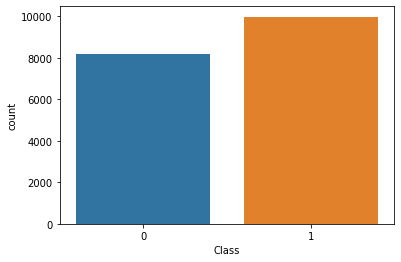

In [173]:
sns.countplot(x='Class',data=df)
plt.show()

In [174]:
df['Class'].value_counts()
sum(df['Class'].value_counts())

18185

In [71]:
8200/18185
# After further inspection the dataset is almost balanced between to classes. 55% of the database has Class = 1 and 45% has Class = 0.

0.45092108880945836

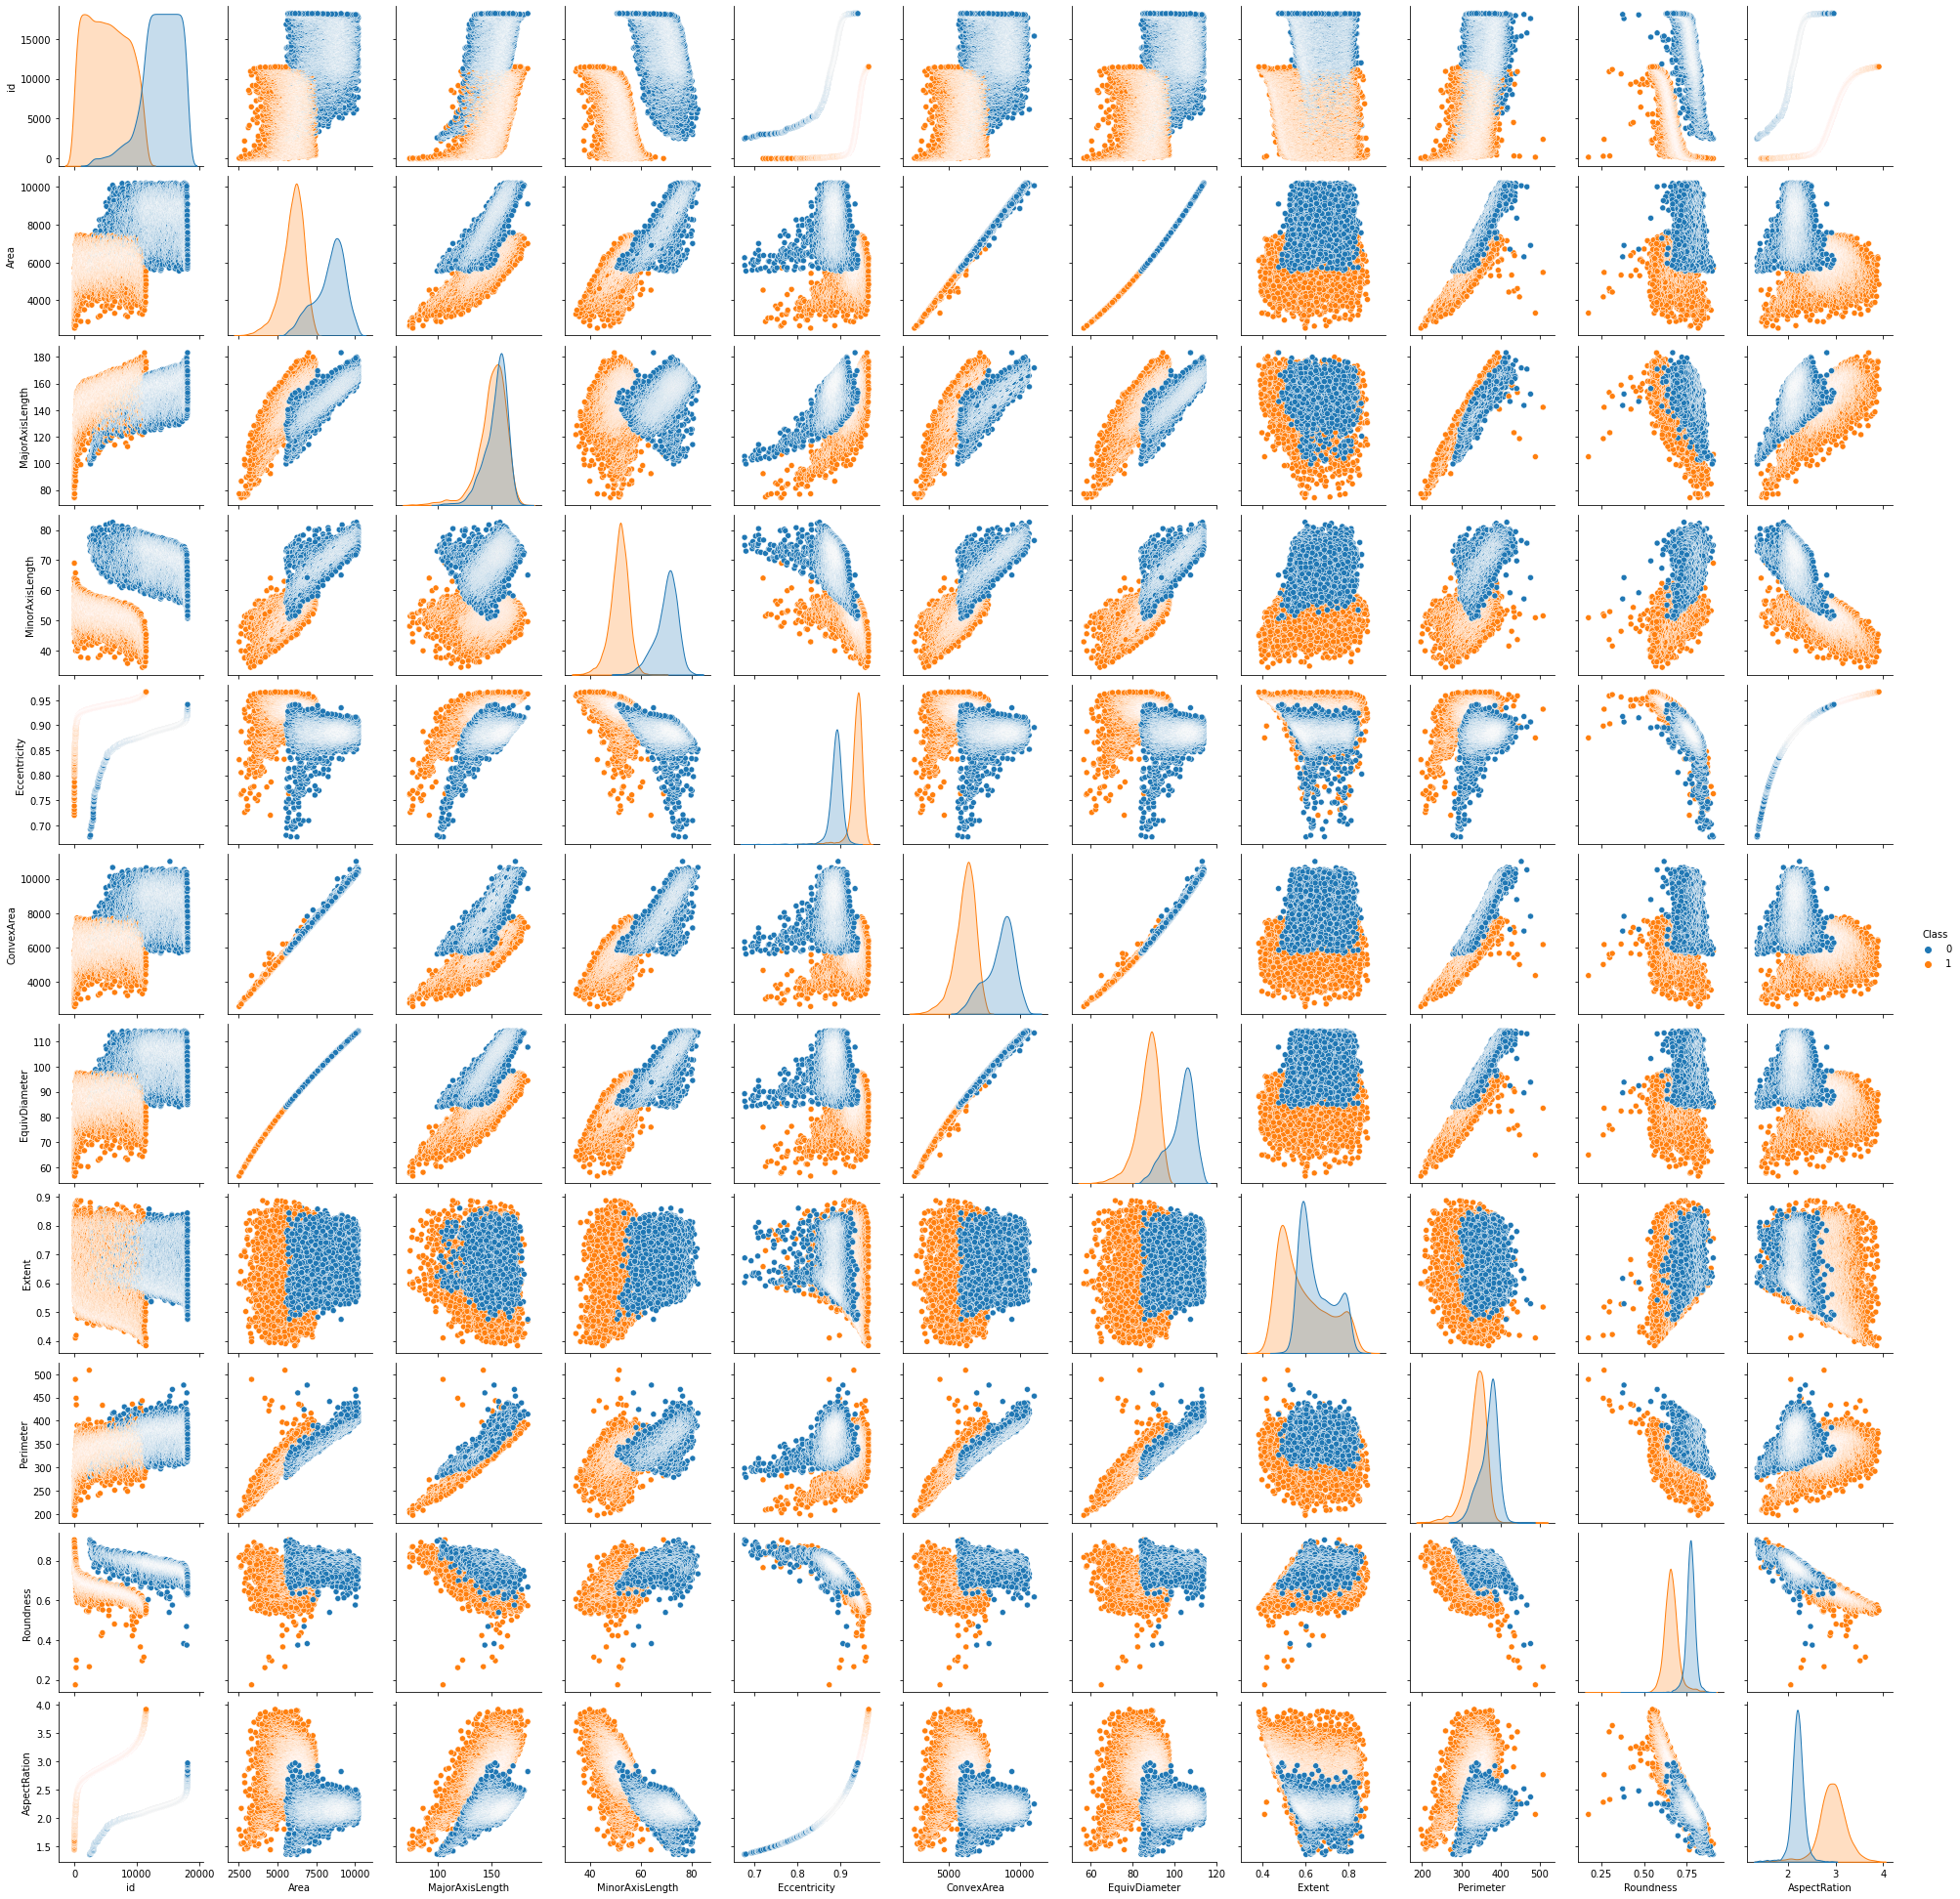

In [176]:
# I will now summon a pair plot, to see how the (previous) classification variable, reacts to the other variables.
sns.pairplot(data=df, hue='Class')
# It took a long time to load. We can clearly see a pattern. The varible Class already differentiates the data between to categories. 

Ι can safely drop the the id column, since it doesn't show anything interesting....... I mean more than the rest :^)

In [19]:
df.drop(columns=['id'],inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


# Ι will now summon a correlation table and a correlation plot heatmap just for fun :^) 

In [13]:
df.corr()
# Can't see much!

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


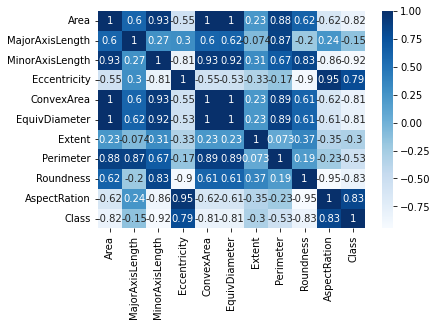

In [14]:
df_corr = df.corr()
sns.heatmap( 
    df_corr, annot = True, cmap = 'Blues',
    xticklabels = df_corr.columns.values,
    yticklabels = df_corr.columns.values
);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

# Better visualization:^)

# Ι can now begin the classification analysis. 

In [20]:
X = df.iloc[:, :-1]#.to_numpy()
y = df['Class']#.to_numpy(

In [21]:
X.shape, y.shape

((18185, 10), (18185,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=99)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14548, 10), (3637, 10), (14548,), (3637,))

In [24]:
k = 5
neighbours = KNeighborsClassifier(n_neighbors=k)

In [25]:
neighbours.fit(X_train, y_train);

In [26]:
y_pred = neighbours.predict(X_test)

In [27]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [28]:
X_test.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
5756,6471,126.540590,67.174053,0.847466,6602,90.769671,0.803651,319.013,0.799033,1.883772
1611,6395,150.012536,55.692851,0.928531,6584,90.235065,0.634425,342.898,0.683472,2.693569
1370,6704,152.919298,57.332999,0.927056,6883,92.389382,0.538042,350.550,0.685558,2.667213
14160,7097,142.033804,64.418724,0.891233,7207,95.058829,0.719048,337.341,0.783694,2.204853
1471,5686,139.963751,52.235634,0.927748,5799,85.086074,0.522706,317.506,0.708782,2.679469


In [29]:
X_test.iloc[0:1]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
5756,6471,126.54059,67.174053,0.847466,6602,90.769671,0.803651,319.013,0.799033,1.883772


In [30]:
y_pred_obs_number_one = neighbours.predict(X_test.iloc[0:1])
y_pred_obs_number_one

array([0])

In [31]:
y_test[0:1]

5756    0
Name: Class, dtype: int64

In [32]:
y_pred_my_whatever_numbers = neighbours.predict([[5.8, 2.8, 5.1, 2.4, 3.3, 4.2, 8.3, 4.3, 7.3 ,6.2]])
y_pred_my_whatever_numbers

array([1])

# Model Evaluation #

In [33]:
neighbours.score(X_test, y_test)

0.9807533681605719

In [34]:
round(accuracy_score(y_test, y_pred) * 100, 4)
# So the accuracy of the KNN test, was very high.

98.0753

In [35]:
y_test[:10], y_pred[:10]

(5756     0
 1611     1
 1370     1
 14160    0
 1471     1
 18142    0
 11064    1
 5471     1
 6039     1
 6799     1
 Name: Class, dtype: int64,
 array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1]))

In [32]:
y_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred},
                    columns=['y_test', 'y_pred'])

y_df["pred"] = y_df.y_test == y_df.y_pred

In [33]:
y_df.head()

,y_test,y_pred,pred
5756,0,0,True
1611,1,1,True
1370,1,1,True
14160,0,0,True
1471,1,1,True


In [34]:
y_df[y_df.pred == False]

,y_test,y_pred,pred
18142,0,1,False
18150,0,1,False
18065,0,1,False
14948,0,1,False
17164,0,1,False
...,...,...,...
2908,0,1,False
17966,0,1,False
18166,0,1,False
443,1,0,False


In [36]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
#Confusion Matrix.

Predicted,0,1,All
True,,,
0,1556,50,1606
1,20,2011,2031
All,1576,2061,3637


# Different Number Comparison #

In [38]:
neighbors = np.arange(2, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [39]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [42]:
# Let's see test_data accuracy#
test_accuracy

array([0.97387957, 0.98185318, 0.98130327, 0.98075337, 0.98020346,
       0.98020346, 0.98130327, 0.97992851, 0.98020346, 0.97937861,
       0.97910366, 0.97745395, 0.97690404, 0.97635414, 0.97662909,
       0.97635414, 0.97690404, 0.97525433])

# Let's create an accuracy plot!

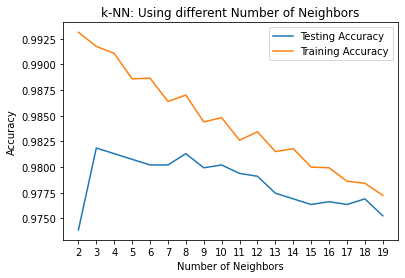

In [43]:
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

# As we can see, both the accuracy if the train and test data, falls, but not by a significant ammount. The general accuracy is between 99.5% and 97.7%.

# Now lets do a KNN test without creating train and test datasets.

In [265]:
k = 5
neighbours = KNeighborsClassifier(n_neighbors=k)

In [266]:
neighbours.fit(X, y);

In [267]:
neighbours.score(X, y)
# Almost perfect accuracy.

0.9887269727797635

In [268]:
neighbors = np.arange(2, 20)
accuracy = np.empty(len(neighbors))

In [269]:
# Loop over different values of k.
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    accuracy[i] = knn.score(X, y)

In [270]:
accuracy

array([0.99279626, 0.99136651, 0.99043167, 0.98872697, 0.98905692,
       0.98707726, 0.98735221, 0.98526258, 0.98597745, 0.9839978 ,
       0.98443772, 0.98223811, 0.98322794, 0.98141325, 0.98190817,
       0.98047842, 0.98080836, 0.97921364])

In [271]:
type(accuracy)

numpy.ndarray

In [272]:
max(accuracy)

0.9927962606543855

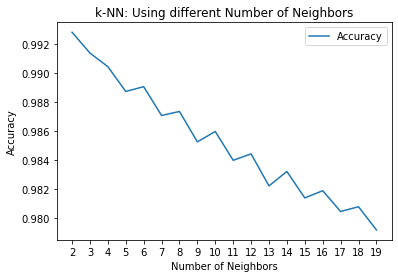

In [231]:
# Lets create the new accuracy plot.
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')

plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

 Again the accuracy of the dataset follows the accuracy of the train dataset 

# During the last lecture, our kind professor ( who is the best in the world....pinky swear!) asked us to do a Logistic Regression analysis on our classification model. # 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
# Let's import the neccesary libraries.

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
predicted_lr = lr.predict(X_test)

In [48]:
acc_lr = accuracy_score(y_test, predicted_lr)
acc_lr

0.9859774539455596

In [49]:
round(acc_lr * 100, 4)

98.5977

In [50]:
final_lr = f1_score(y_test, predicted_lr, pos_label=1)
final_lr

0.9874476987447699

In [51]:
round(final_lr * 100, 4)

98.7448

 So the model has a Logistic Regression accuracy of 98.59% and a final score of 98.74%. Decent!! 

# This last part, I found it in a website. I believe it measures which method is the best for this analysis. I believe, I first have to delete some observations. 

In [52]:
models = {
    "Logistic Regression": LogisticRegression(),
    "      Decision Tree": DecisionTreeClassifier(),
    "     Neural Network": MLPClassifier(),
    "      Random Forest": RandomForestClassifier(),
    "  Gradient Boosting": GradientBoostingClassifier(),
    " AdaBoostClassifier": AdaBoostClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
      Decision Tree trained.
     Neural Network trained.
      Random Forest trained.
  Gradient Boosting trained.
 AdaBoostClassifier trained.
KNeighborsClassifier trained.


In [53]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(name + " Accuracy: {:.2f}%".format(acc * 100))

Logistic Regression Accuracy: 98.60%
      Decision Tree Accuracy: 97.88%
     Neural Network Accuracy: 98.16%
      Random Forest Accuracy: 98.65%
  Gradient Boosting Accuracy: 98.60%
 AdaBoostClassifier Accuracy: 98.57%
KNeighborsClassifier Accuracy: 98.08%


The beat prediction method for this dataset is the Random Forest Method, since it has an accuracy of 98.65%.  

# Τhank you for listening to my TED Talk!
# "Αctor's Bow"